#  Import Necessary Libraries

In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
import time
#

# Load and Preprocess the Dataset

In [2]:
# Define the path to the dataset
train_dir = 'D:/MLCourse/dogs-vs-cats-dataset/train/'
test_dir = 'D:/MLCourse/dogs-vs-cats-dataset/test1/'

# Initialize lists to hold features and labels
features = []
labels = []
image_size = (50, 50)

# Process train images
train_images = os.listdir(train_dir)
for image in tqdm(train_images, desc="Processing Train Images"):
    if image.startswith('cat'):
        label = 0
    else:
        label = 1
    image_read = cv2.imread(os.path.join(train_dir, image))
    image_resized = cv2.resize(image_read, image_size)
    image_normalized = image_resized / 255.0
    image_flatten = image_normalized.flatten()
    features.append(image_flatten)
    labels.append(label)

# Convert lists to numpy arrays
features = np.asarray(features)
labels = np.asarray(labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, shuffle=True, random_state=42)

Processing Train Images: 100%|██████████| 25000/25000 [03:06<00:00, 134.29it/s]


# Define and Train the PCA + SVM Pipeline

Here, we define a machine learning pipeline that combines PCA for dimensionality reduction and SVM for classification.
- A smaller parameter grid is defined for `GridSearchCV` to search for the best model parameters.
- The model is trained using the training data with cross-validation (`cv=2`) to identify the best parameters.
- The best model parameters, score, and training time are printed.


In [3]:
# Define the PCA and SVM pipeline with fewer parameters
pipeline = Pipeline([
    ('pca', PCA(random_state=42)),
    ('svm', SVC(verbose=True))
])

# Define a smaller parameter grid for GridSearchCV
param_grid = {
    'pca__n_components': [0.9, 0.8],  # Reduced components to test
    'svm__kernel': ['rbf', 'linear'],  # Reduced kernels
    'svm__C': [0.1, 1],  # Reduced C values
    'svm__gamma': ['scale']  # Single gamma value
}

# Perform GridSearchCV with fewer cross-validation folds
start_time = time.time()
grid_search = GridSearchCV(pipeline, param_grid, cv=2, verbose=2)  # Fewer folds and verbose output
grid_search.fit(X_train, y_train)
end_time = time.time()

# Get and print the best model parameters, score, and training time
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)
print("Training Time: {:.2f} seconds".format(end_time - start_time))

Fitting 2 folds for each of 8 candidates, totalling 16 fits
[LibSVM][CV] END pca__n_components=0.9, svm__C=0.1, svm__gamma=scale, svm__kernel=rbf; total time= 6.9min
[LibSVM][CV] END pca__n_components=0.9, svm__C=0.1, svm__gamma=scale, svm__kernel=rbf; total time= 6.5min
[LibSVM][CV] END pca__n_components=0.9, svm__C=0.1, svm__gamma=scale, svm__kernel=linear; total time= 6.5min
[LibSVM][CV] END pca__n_components=0.9, svm__C=0.1, svm__gamma=scale, svm__kernel=linear; total time= 6.3min
[LibSVM][CV] END pca__n_components=0.9, svm__C=1, svm__gamma=scale, svm__kernel=rbf; total time= 6.7min
[LibSVM][CV] END pca__n_components=0.9, svm__C=1, svm__gamma=scale, svm__kernel=rbf; total time= 6.1min
[LibSVM][CV] END pca__n_components=0.9, svm__C=1, svm__gamma=scale, svm__kernel=linear; total time= 8.7min
[LibSVM][CV] END pca__n_components=0.9, svm__C=1, svm__gamma=scale, svm__kernel=linear; total time= 8.8min
[LibSVM][CV] END pca__n_components=0.8, svm__C=0.1, svm__gamma=scale, svm__kernel=rbf; t

# Optimize and Retrain the PCA + SVM Pipeline

After initial experimentation, the parameter grid is further reduced to a single set of parameters for faster training.
- The pipeline is retrained with these optimized settings.
- If training is successful, the best model parameters, score, and training time are captured and printed.
- Any errors during training are caught and displayed.


In [6]:
# Define the PCA and SVM pipeline with fewer parameters
pipeline = Pipeline([
    ('pca', PCA(random_state=42)),
    ('svm', SVC(verbose=True))
])

# Define a smaller parameter grid for GridSearchCV
param_grid = {
    'pca__n_components': [0.9],  # Single component to test
    'svm__kernel': ['rbf'],  # Single kernel type
    'svm__C': [1],  # Single C value
    'svm__gamma': ['scale']  # Single gamma value
}

# Perform GridSearchCV with fewer cross-validation folds
start_time = time.time()
grid_search = GridSearchCV(pipeline, param_grid, cv=2, verbose=2)  # Fewer folds and verbose output
try:
    grid_search.fit(X_train, y_train)
    end_time = time.time()

    # Get and print the best model parameters, score, and training time
    best_pipeline = grid_search.best_estimator_
    print("Best Parameters: ", grid_search.best_params_)
    print("Best Score: ", grid_search.best_score_)
    print("Training Time: {:.2f} seconds".format(end_time - start_time))
except Exception as e:
    print(f"An error occurred: {e}")


Fitting 2 folds for each of 1 candidates, totalling 2 fits
[LibSVM][CV] END pca__n_components=0.9, svm__C=1, svm__gamma=scale, svm__kernel=rbf; total time= 8.3min
[LibSVM][CV] END pca__n_components=0.9, svm__C=1, svm__gamma=scale, svm__kernel=rbf; total time= 8.4min
[LibSVM]Best Parameters:  {'pca__n_components': 0.9, 'svm__C': 1, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'}
Best Score:  0.663
Training Time: 1684.55 seconds


# Evaluate the Model

In this cell, we evaluate the performance of the trained model on the test set.
- The accuracy of the model is calculated.
- A classification report and confusion matrix are generated to provide detailed insights into the model's performance.
- The classification report is saved to a text file, and the confusion matrix is saved as an image.


Accuracy: 0.6846
Classification Report:
               precision    recall  f1-score   support

         Cat       0.69      0.69      0.69      2515
         Dog       0.68      0.68      0.68      2485

    accuracy                           0.68      5000
   macro avg       0.68      0.68      0.68      5000
weighted avg       0.68      0.68      0.68      5000



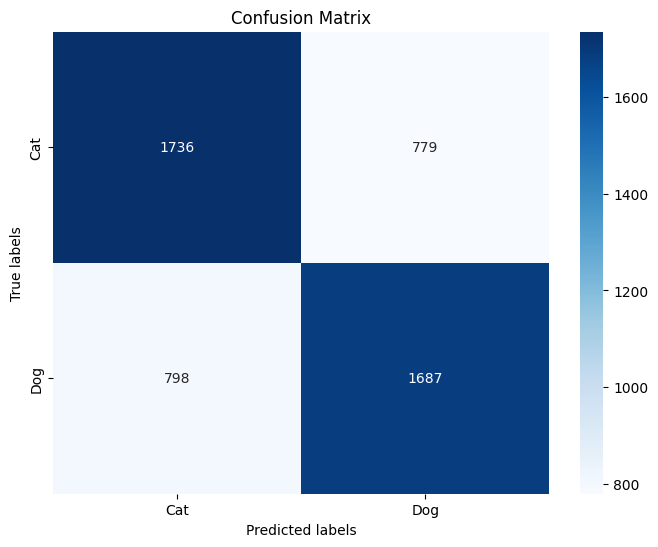

In [8]:
# Define the directory where results will be saved
folder_path = "results"
os.makedirs(folder_path, exist_ok=True)

# Ensure that best_pipeline is defined before running the evaluation
if 'best_pipeline' in locals():
    # Evaluate on the test dataset
    accuracy = best_pipeline.score(X_test, y_test)
    print("Accuracy:", accuracy)

    # Make predictions
    y_pred = best_pipeline.predict(X_test)

    # Classification report
    target_names = ['Cat', 'Dog']
    classification_rep = classification_report(y_test, y_pred, target_names=target_names)
    print("Classification Report:\n", classification_rep)

    # Save the classification report to a text file
    classification_file_path = os.path.join(folder_path, 'classification_report.txt')
    with open(classification_file_path, 'w') as file:
        file.write(classification_rep)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    confusion_image_path = os.path.join(folder_path, 'confusion_matrix.png')
    plt.savefig(confusion_image_path)
    plt.show()

else:
    print("Error: 'best_pipeline' is not defined. Please ensure that the GridSearchCV cell ran successfully.")

# Load and Predict on an Unseen Image

In this cell, we load and preprocess an unseen image, then use the trained model to predict its class (Cat or Dog).
- **Preprocessing**: The image is resized to match the input dimensions used during training, normalized, and flattened.
- **Prediction**: The processed image is fed into the trained pipeline (`best_pipeline`) to make a prediction.
- The predicted class is then displayed along with the corresponding image.
- If the `best_pipeline` is not defined, an error message is shown.


Predicted class: Cat


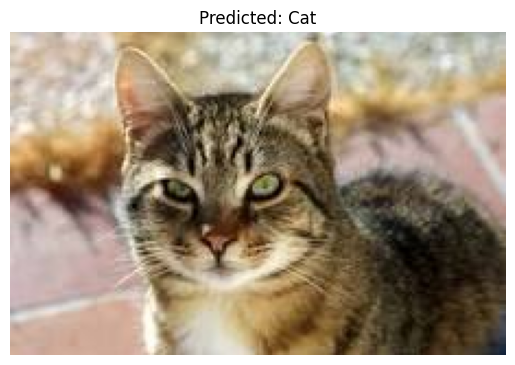

In [10]:
# Define the path to the unseen image
unseen_image_path = "catimg.jpg"  # Change this to the path of your unseen image

# Load and preprocess the unseen image
def preprocess_image(image_path, target_size=(50, 50)):
    image = cv2.imread(image_path)
    image_resized = cv2.resize(image, target_size)
    image_normalized = image_resized / 255.0
    image_flatten = image_normalized.flatten()
    return image_flatten.reshape(1, -1)  # Reshape to match the input shape for the model

# Preprocess the unseen image
unseen_image_flatten = preprocess_image(unseen_image_path)

# Ensure best_pipeline is defined before making predictions
if 'best_pipeline' in locals():
    # Make prediction
    prediction = best_pipeline.predict(unseen_image_flatten)
    predicted_class = 'Cat' if prediction[0] == 0 else 'Dog'

    # Display the result
    print(f"Predicted class: {predicted_class}")

    # Display the image
    img = cv2.imread(unseen_image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.title(f"Predicted: {predicted_class}")
    plt.axis('off')
    plt.show()

else:
    print("Error: 'best_pipeline' is not defined. Please ensure that the GridSearchCV cell ran successfully.")